<a href="https://colab.research.google.com/github/Pranay3832/Data-Science-Job-Salaries/blob/main/Data_Science_Job_Salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Data Science Job Salaries **

Made By : Pranay Kudale

### Step 1 : Importing Important Libraries

In [1]:
%pip install country_converter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 2.6 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor # Another regression model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler # For more robust encoding and scaling
import country_converter as coco # To handle country name conversions


### Step 2 : Loading the DataSet

In [6]:
df = pd.read_csv('/content/Data Science Job Salaries.csv')
print("Original Data Info:")
df.info()

# Display the first 5 rows of the dataframe
print("Data Head:")
display(df.head())

# Display information about the dataframe
print("\nData Info:")
display(df.info())

# Display the shape of the dataframe (number of rows and columns)
print("\nData Shape:")
display(df.shape)

Original Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB
Data Head:


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


None


Data Shape:


(607, 12)

### Step 3 : Data Cleaning

Data Preprocessing and Feature Engineering

In [7]:
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

# Drop original 'salary' and 'salary_currency' as 'salary_in_usd' is the target
df.drop(['salary', 'salary_currency'], axis=1, inplace=True)

# Rename 'salary_in_usd' to 'salary' for simplicity
df.rename(columns={'salary_in_usd': 'salary'}, inplace=True)

# Drop duplicates
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
print(f"\nDropped {initial_rows - df.shape[0]} duplicate rows.")


Dropped 42 duplicate rows.


Standardize Categorical Columns / Convert abbreviations to complete values

In [8]:
# Use country_converter for company_location and employee_residence
cc = coco.CountryConverter()
df['company_location'] = cc.convert(df['company_location'], to='name_short')
df['employee_residence'] = cc.convert(df['employee_residence'], to='name_short')

# Map experience_level
experience_map = {
    'EN': 'Entry-level',
    'MI': 'Mid-level',
    'SE': 'Senior-level',
    'EX': 'Executive-level'
}
df['experience_level'] = df['experience_level'].map(experience_map)

# Map employment_type
employment_map = {
    'PT': 'Part-time',
    'FT': 'Full-time',
    'CT': 'Contract',
    'FL': 'Freelance'
}
df['employment_type'] = df['employment_type'].map(employment_map)

# Map company_size
company_size_map = {
    'S': 'Small',
    'M': 'Medium',
    'L': 'Large'
}
df['company_size'] = df['company_size'].map(company_size_map)

# Map remote_ratio to job_type
df.rename(columns={'remote_ratio': 'job_type'}, inplace=True)
job_type_map = {
    0: 'On-site',
    50: 'Hybrid',
    100: 'Remote'
}
df['job_type'] = df['job_type'].map(job_type_map)

print("\nData after initial preprocessing and mapping:")
df.info()
print("\nFirst 5 rows after preprocessing:")
print(df.head())


Data after initial preprocessing and mapping:
<class 'pandas.core.frame.DataFrame'>
Index: 565 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           565 non-null    int64 
 1   experience_level    565 non-null    object
 2   employment_type     565 non-null    object
 3   job_title           565 non-null    object
 4   salary              565 non-null    int64 
 5   employee_residence  565 non-null    object
 6   job_type            565 non-null    object
 7   company_location    565 non-null    object
 8   company_size        565 non-null    object
dtypes: int64(2), object(7)
memory usage: 44.1+ KB

First 5 rows after preprocessing:
   work_year experience_level employment_type                   job_title  \
0       2020        Mid-level       Full-time              Data Scientist   
1       2020     Senior-level       Full-time  Machine Learning Scientist   
2       2

### Step 3 : Exploratory Data Analysis (EDA)

1 Salary Distribution

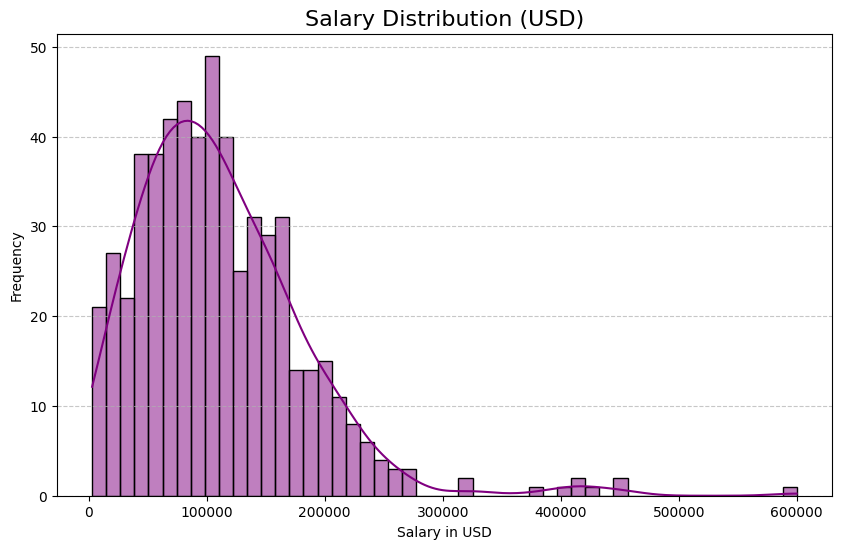

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['salary'], bins=50, kde=True, color='purple')
plt.title('Salary Distribution (USD)', fontsize=16)
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

2 Mean Salary by Experience Level (using a bar plot with error bars)

/tmp/ipython-input-3550241687.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='experience_level', y='salary', data=df, estimator=np.mean, ci='sd', palette='viridis',
/tmp/ipython-input-3550241687.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='experience_level', y='salary', data=df, estimator=np.mean, ci='sd', palette='viridis',


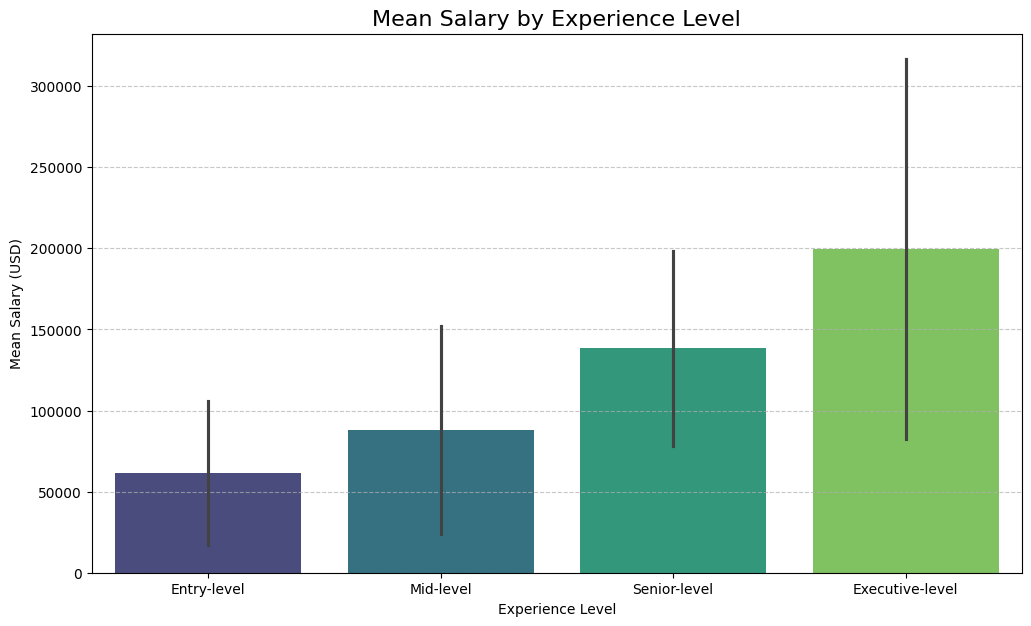

In [10]:
plt.figure(figsize=(12, 7))
sns.barplot(x='experience_level', y='salary', data=df, estimator=np.mean, ci='sd', palette='viridis',
            order=['Entry-level', 'Mid-level', 'Senior-level', 'Executive-level'])
plt.title('Mean Salary by Experience Level', fontsize=16)
plt.xlabel('Experience Level')
plt.ylabel('Mean Salary (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

3 Salary vs. Job Type and Company Size (using a box plot)

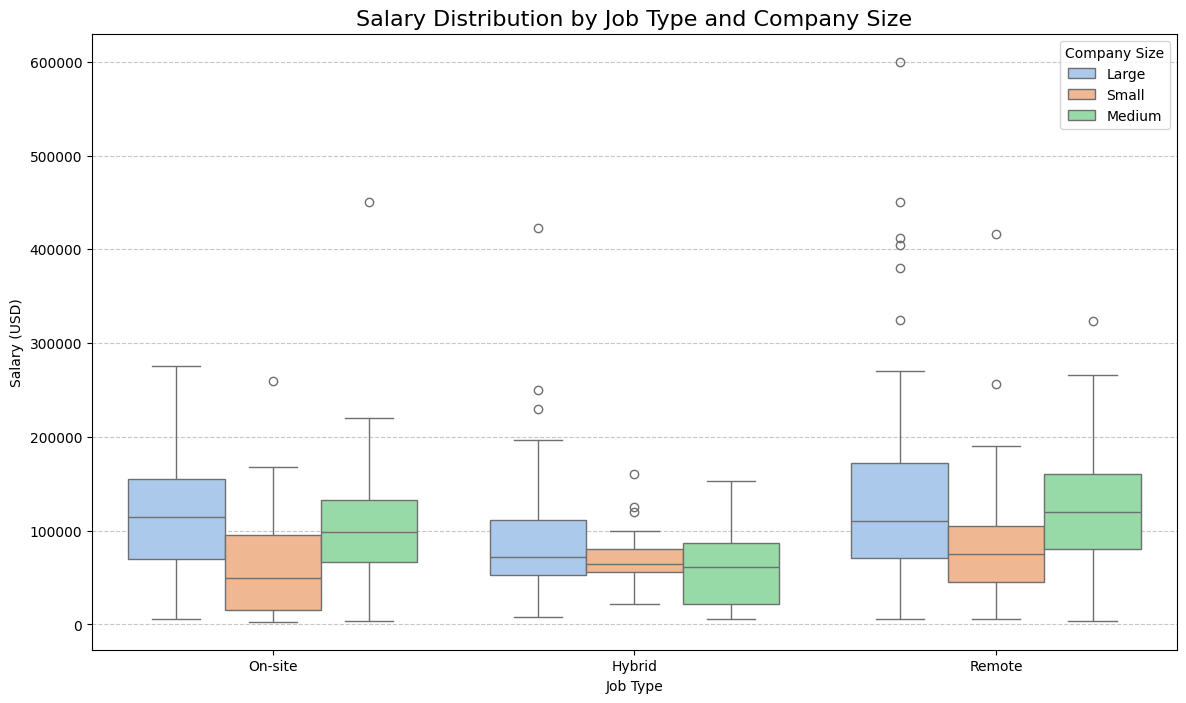

In [11]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='job_type', y='salary', hue='company_size', data=df, palette='pastel',
            order=['On-site', 'Hybrid', 'Remote'])
plt.title('Salary Distribution by Job Type and Company Size', fontsize=16)
plt.xlabel('Job Type')
plt.ylabel('Salary (USD)')
plt.legend(title='Company Size')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


4 Top N Job Titles by Mean Salary (e.g., top 10)

/tmp/ipython-input-4115479273.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_salary_by_job.values, y=mean_salary_by_job.index, palette='magma')


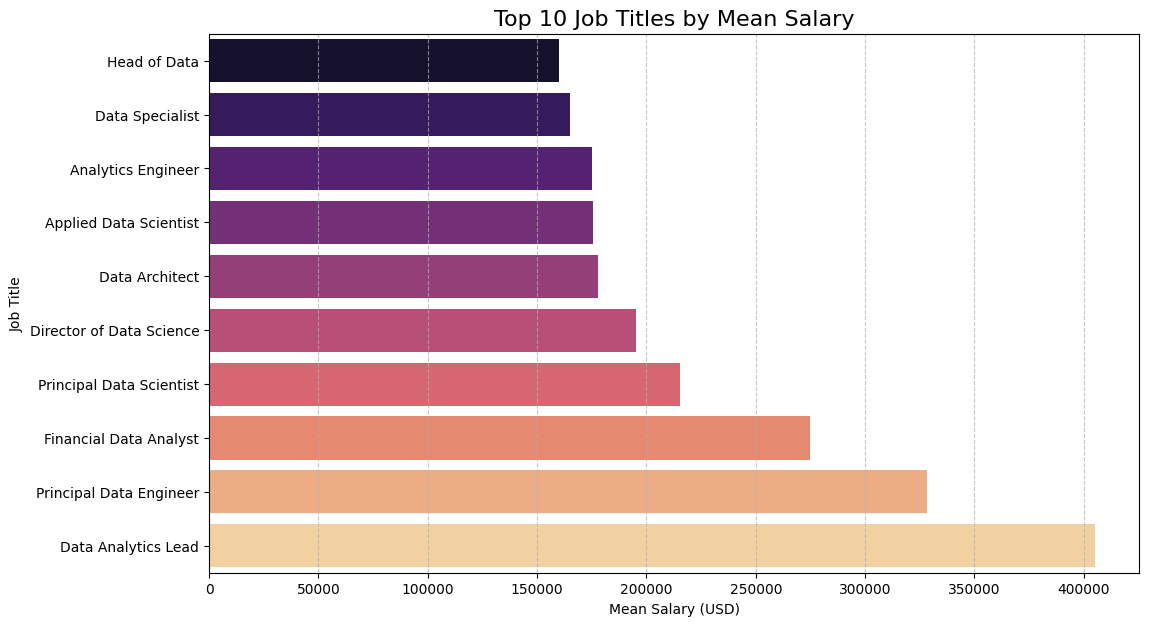

In [12]:
top_n_jobs = 10
mean_salary_by_job = df.groupby('job_title')['salary'].mean().nlargest(top_n_jobs).sort_values(ascending=True)

plt.figure(figsize=(12, 7))
sns.barplot(x=mean_salary_by_job.values, y=mean_salary_by_job.index, palette='magma')
plt.title(f'Top {top_n_jobs} Job Titles by Mean Salary', fontsize=16)
plt.xlabel('Mean Salary (USD)')
plt.ylabel('Job Title')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Step 4 : Feature Engineering and Model Preparation

In [13]:
# Label Encoding for ordinal features
le = LabelEncoder()
df['experience_level_encoded'] = le.fit_transform(df['experience_level'])

# One-Hot Encoding for nominal features
# Drop original categorical columns after encoding
df_encoded = pd.get_dummies(df, columns=['employment_type', 'job_title', 'employee_residence',
                                         'job_type', 'company_location', 'company_size'], drop_first=True)

# Drop original experience_level as we have an encoded version
df_encoded.drop('experience_level', axis=1, inplace=True)


# Define features (X) and target (y)
# Drop 'work_year' for this model as it might be collinear or less directly predictive after other features
X = df_encoded.drop('salary', axis=1)
y = df_encoded['salary']


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # Increased test size slightly

# Scale numerical features (optional, but good for many models, especially linear ones)
scaler = StandardScaler()
# Assuming 'work_year' is the only remaining numerical feature apart from the target and encoded ones
numerical_cols_to_scale = ['work_year', 'experience_level_encoded'] # Add other numerical features if present
X_train[numerical_cols_to_scale] = scaler.fit_transform(X_train[numerical_cols_to_scale])
X_test[numerical_cols_to_scale] = scaler.transform(X_test[numerical_cols_to_scale])



### Step 5 : Predictive Modeling

In [16]:
# Using RandomForestRegressor as an alternative to Linear Regression for potentially better performance
# It can capture non-linear relationships and interactions
model = RandomForestRegressor(n_estimators=150, random_state=42, n_jobs=-1, max_depth=10, min_samples_leaf=5)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

### Step 5 : Model Evaluation

In [18]:
print("\n--- Model Evaluation (RandomForestRegressor) ---")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R-squared (R2): {r2_score(y_test, y_pred):.2f}")


--- Model Evaluation (RandomForestRegressor) ---
Mean Absolute Error (MAE): 32785.39
Mean Squared Error (MSE): 2503064707.02
Root Mean Squared Error (RMSE): 50030.64
R-squared (R2): 0.48


Visualize Actual vs. Predicted Salaries

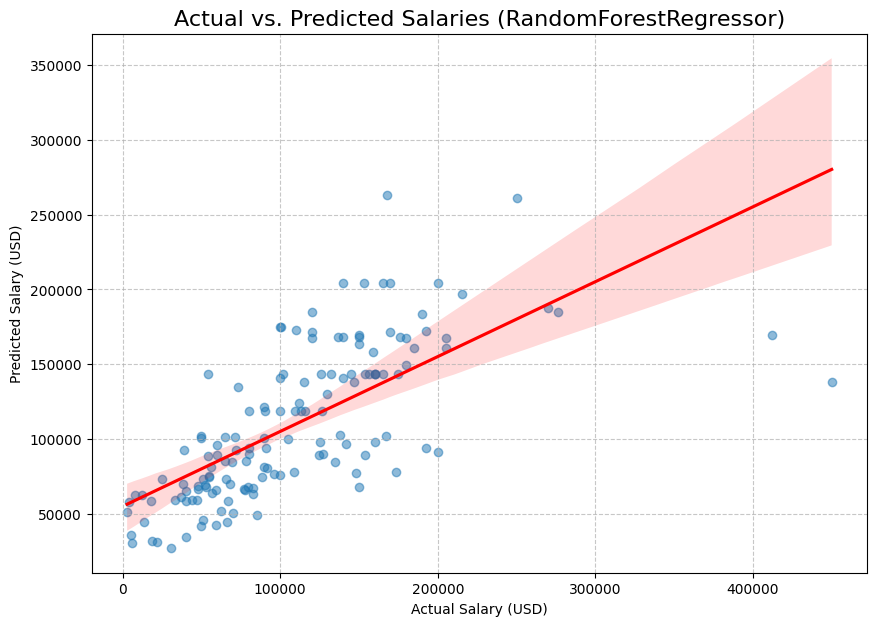

In [19]:
plt.figure(figsize=(10, 7))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Actual vs. Predicted Salaries (RandomForestRegressor)', fontsize=16)
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

Feature Importance (for tree-based models)

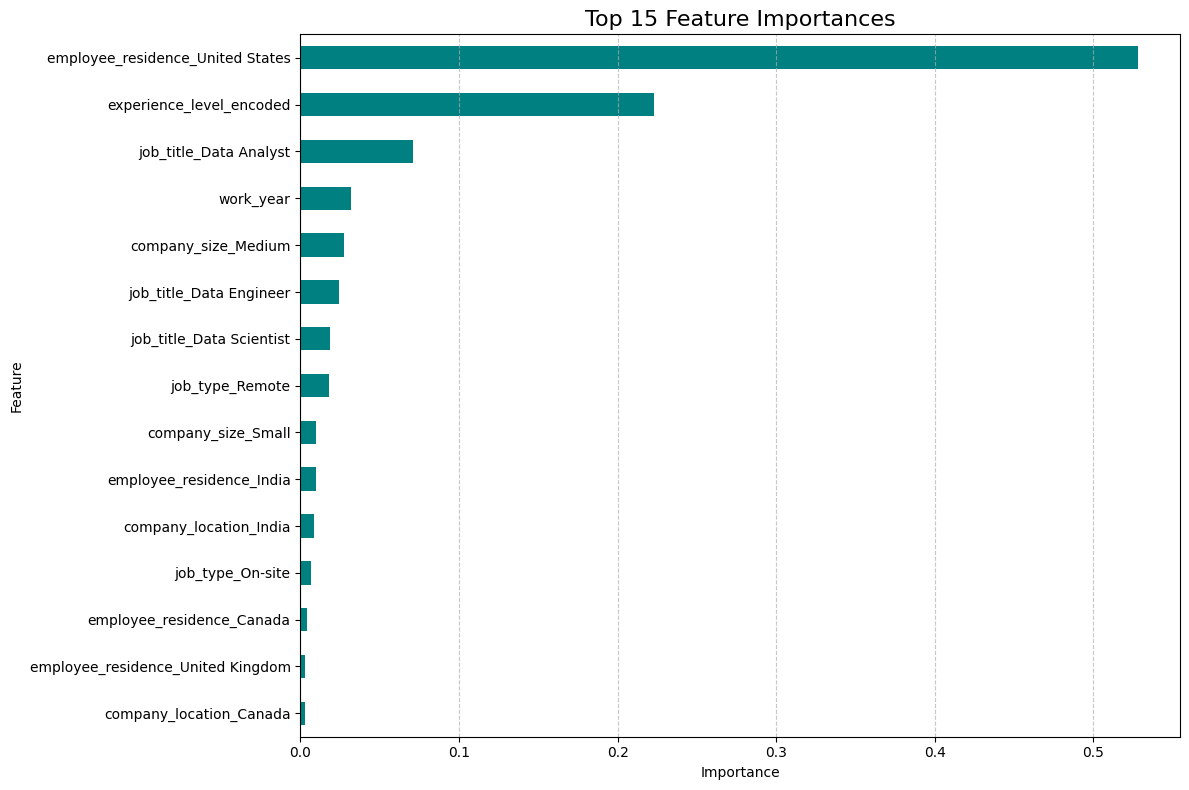


This code provides an alternative and more robust approach to predicting data science job salaries.
It includes more sophisticated preprocessing steps like using `country_converter`, a powerful `RandomForestRegressor` model, and additional evaluation metrics and visualizations.


In [20]:
if hasattr(model, 'feature_importances_'):
    feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
    plt.figure(figsize=(12, 8))
    feature_importances.nlargest(15).sort_values(ascending=True).plot(kind='barh', color='teal')
    plt.title('Top 15 Feature Importances', fontsize=16)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

print("\nThis code provides an alternative and more robust approach to predicting data science job salaries.")
print("It includes more sophisticated preprocessing steps like using `country_converter`, a powerful `RandomForestRegressor` model, and additional evaluation metrics and visualizations.")
